### Tutorial instructions: 

1. You can start reading at page 5, and do exercises 9-12 but ONLY for the t-test (not the tests listed).

2. Next, read the section about power curves, then make a graph of power curves like the one in the tutorial, but with deltas varying from 0.1-0.9 by 0.1. Do exercise 13.

3. Work through the section on Cox regression and do exercise 14.

4. If you have time and interest, you can work through the section on Power Simulation. You can also do exercise 16 if you want (not required).


## Power Analysis in R Add-on Packages

`pwr` contains more general functions for power analysis
and sample size calculations

`powerSurvEpi` contains functions for
power and sample size determination for some survival models.

In [1]:
install.packages(c("pwr", "powerSurvEpi"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(pwr)

You specify the values for all the arguments
except one (which is left as NULL), and that unspecified variable is computed
by the function

* ES.h Effect size calculation for proportions

* ES.w1 Effect size calculation in the chi-squared test
for goodness of fit

* ES.w2 Effect size calculation in the chi-squared test
for association

* cohen.ES Conventional effects size

* pwr-package Basic power calculations pwr

* pwr.2p.test Power calculation for two proportions (same
sample sizes)

* pwr.2p2n.test Power calculation for two proportions
(different sample sizes)

* pwr.anova.test Power calculations for balanced one-way
analysis of variance tests

* pwr.chisq.test power calculations for chi-squared tests

* pwr.f2.test Power calculations for the general linear model

* pwr.norm.test Power calculations for the mean of a normal
distribution (known variance)

* pwr.p.test Power calculations for proportion tests (one
sample)

* pwr.r.test Power calculations for correlation test

* pwr.t.test Power calculations for t-tests of means (one
sample, two samples and paired samples)

* pwr.t2n.test Power calculations for two samples (different
sizes) t-tests of means

## Effect Sizes
Frequently, we do not know the likely effect
size that may occur in an experiment. The best approach is then to do a pilot
experiment on a small scale to estimate the likely effect size. In the absence of
pilot data, Cohen (1988) provides standard measures of effect size, classified as
"small", "medium", and "large" for a variety of tests. These effect sizes are built
into the pwr package, using the function cohen.ES. Although these "standard"
effect sizes are somewhat arbitrary, they can provide a first guide for sample size
estimation.

In [36]:
# Exercise 9
# Use cohen.ES to extract small, medium and large effect sizes for t-test
cohen.ES(test = "t", size = c("small"))
cohen.ES(test = "t", size = c("medium"))
cohen.ES(test = "t", size = c("large"))


     Conventional effect size from Cohen (1982) 

           test = t
           size = small
    effect.size = 0.2



     Conventional effect size from Cohen (1982) 

           test = t
           size = medium
    effect.size = 0.5



     Conventional effect size from Cohen (1982) 

           test = t
           size = large
    effect.size = 0.8


In [51]:
# Exercise 10
# Use the above effect sizes to calculate sample sizes with power = 0.8,
# and sig.level = 0.05, using pwr.t.test
pwr.t.test(n = NULL, d = 0.2, sig.level = 0.05, power = 0.8)
pwr.t.test(n = NULL, d = 0.5, sig.level = 0.05, power = 0.8)
pwr.t.test(n = NULL, d = 0.8, sig.level = 0.05, power = 0.8)


     Two-sample t test power calculation 

              n = 393.4057
              d = 0.2
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 25.52458
              d = 0.8
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [40]:
# Exercise 11
# Calculate the power of the above tests with sample sizes 10, 50, 100
pwr.t.test(n = c(10,50,100), d = 0.2, sig.level = 0.05, power = NULL)
pwr.t.test(n = c(10,50,100), d = 0.5, sig.level = 0.05, power = NULL)
pwr.t.test(n = c(10,50,100), d = 0.8, sig.level = 0.05, power = NULL)


     Two-sample t test power calculation 

              n = 10, 50, 100
              d = 0.2
      sig.level = 0.05
          power = 0.07082135, 0.16767549, 0.29064587
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 10, 50, 100
              d = 0.5
      sig.level = 0.05
          power = 0.1850957, 0.6968934, 0.9404272
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 10, 50, 100
              d = 0.8
      sig.level = 0.05
          power = 0.3950692, 0.9772791, 0.9998784
    alternative = two.sided

NOTE: n is number in *each* group


In [42]:
# Exercise 12
# Calculate the detectable effect size
# when power = 0.8 and n = 10, 50, 100.
pwr.t.test(n = 10, d = NULL, sig.level = 0.05, power = 0.8)
pwr.t.test(n = 50, d = NULL, sig.level = 0.05, power = 0.8)
pwr.t.test(n = 100, d = NULL, sig.level = 0.05, power = 0.8)


     Two-sample t test power calculation 

              n = 10
              d = 1.324947
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 50
              d = 0.565858
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 100
              d = 0.3981407
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


## Power Curves
```
nvals <- seq(2, 100, length.out=200)
powvals <- sapply(nvals, function (x) power.t.test(n=x, delta=1)$power)
plot(nvals, powvals, xlab="n", ylab="power",
main="Power curve for\n t-test with delta = 1",
lwd=2, col="red", type="l")
```

```
deltas <- c(0.2, 0.4, 0.8)
plot(nvals, seq(0,1, length.out=length(nvals)), xlab="n", ylab="power",
main="Power Curve for\nt-test with varying delta", type="n")
for (i in 1:3) {
powvals <- sapply(nvals, function (x) power.t.test(n=x, delta=deltas[i])$power)
lines(nvals, powvals, lwd=2, col=i)
}
legend("topleft", lwd=2, col=1:3, legend=c("0.2", "0.4", "0.8"))
```

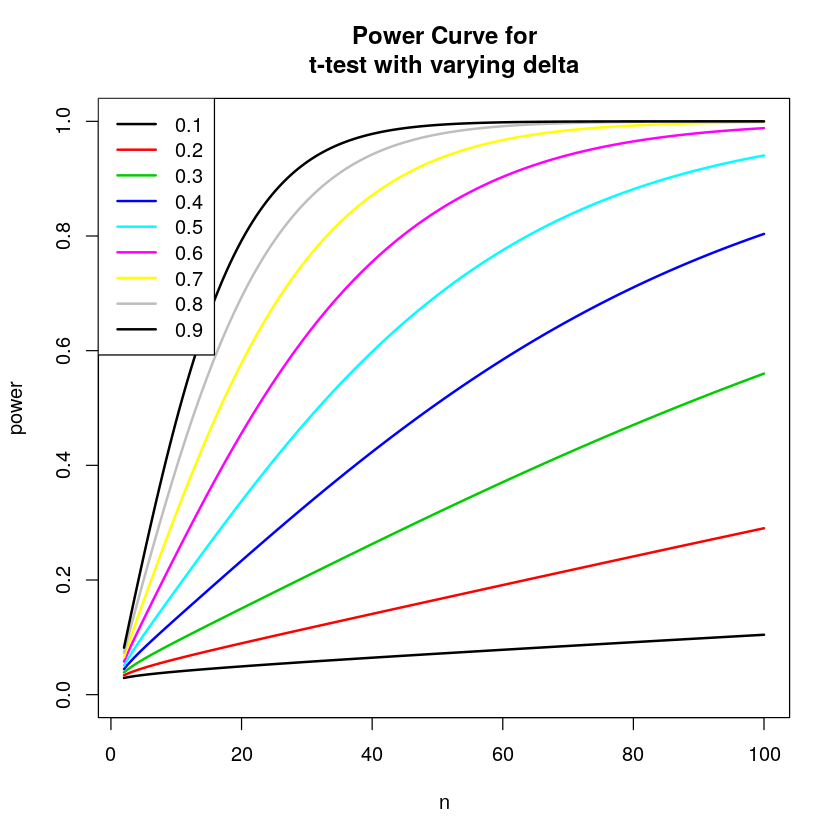

In [53]:
nvals <- seq(2, 100, length.out=200)
deltas <- seq(from = 0.1, to = 0.9, by = 0.1)
plot(nvals, seq(0, 1, length.out=length(nvals)), xlab="n", ylab="power",
main="Power Curve for\nt-test with varying delta", type="n")
for (i in 1:length(deltas)) {
    powvals <- sapply(nvals, function (x) power.t.test(n=x, delta=deltas[i])$power)
    lines(nvals, powvals, lwd=2, col=i)
}
legend("topleft", lwd=2, col=1:length(deltas), legend=deltas)

In [57]:
## Exercise 13
# Make a graph of the relationship between effect size and power, for a
# sample size of 5, 10, and 20, using power.t.test

nvals <- c(5, 10, 20)
deltas <- seq(from = 0.1, to = 0.9, by = 0.1)

plot(deltas, seq(0, 1, length.out=length(deltas)), xlab="d", ylab="power",
main="Power Curve for\nt-test with varying size", type="n")
for (i in 1:length(nvals)) {
    powvals <- sapply(deltas, function (x) power.t.test(n=nvals[i], delta=x)$power)
    lines(deltas, powvals, lwd=2, col=i)
}
                      
legend("topleft", lwd=2, col=1:length(nvals), legend=nvals)

## Power of Cox Regression

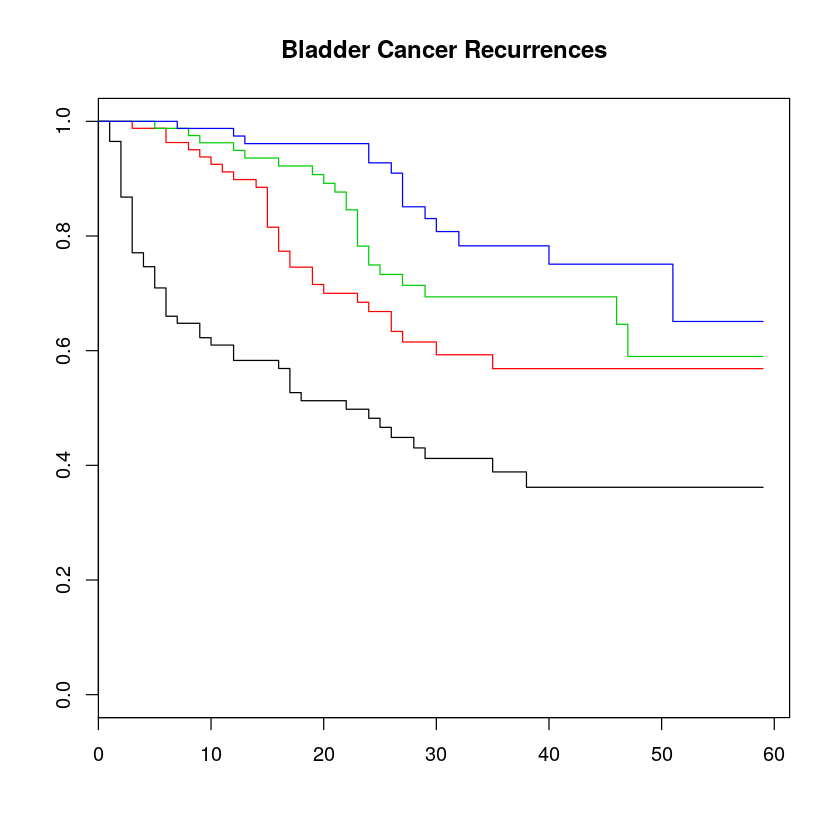

In [65]:
library(survival)
tst <-coxph(Surv(stop, event) ~ strata(enum), bladder)
plot(survfit(tst), col=1:4, main="Bladder Cancer Recurrences",
mark.time=FALSE)

How many subjects do we need for such a survival study? (the function only works for two groups)

In [66]:
library(powerSurvEpi)
bl2 <- bladder[bladder$enum==1|bladder$enum==2,]
bl2$enum2 <- ifelse(bl2$enum==1, "C", "E")
bl3 <- bl2[,c("stop", "event", "enum2")]
PCT100 <- powerCT(Surv(stop, event)~enum2, dat=bl3, nE=100,
nC=100, RR=1.6)
print(PCT100$power)

[1] 0.7507715


This is quite low...

In [67]:
# k = 1 means that we want equal numbers in each group
ss <- ssizeCT(Surv(stop, event)~enum2, dat=bl3,
power=0.85, RR=1.6, k=1)
print(ss$ssize)

 nE  nC 
130 130 


In [ ]:
## Exercise 14
# Construct a graph of the relationship between power and sample size using
# the pilot data (bl3), for a relative risk of 0.8, 1.4, 1.8. and sample sizes
# ranging from 10 to 200.

In [74]:
library(powerSurvEpi)
bl2 <- bladder[bladder$enum==1|bladder$enum==2,]
bl2$enum2 <- ifelse(bl2$enum==1, "C", "E")
bl3 <- bl2[,c("stop", "event", "enum2")]

In [75]:
nvals <- seq(10, 200, length.out=200)
rrisks <- c(0.8, 1.4, 1.8)

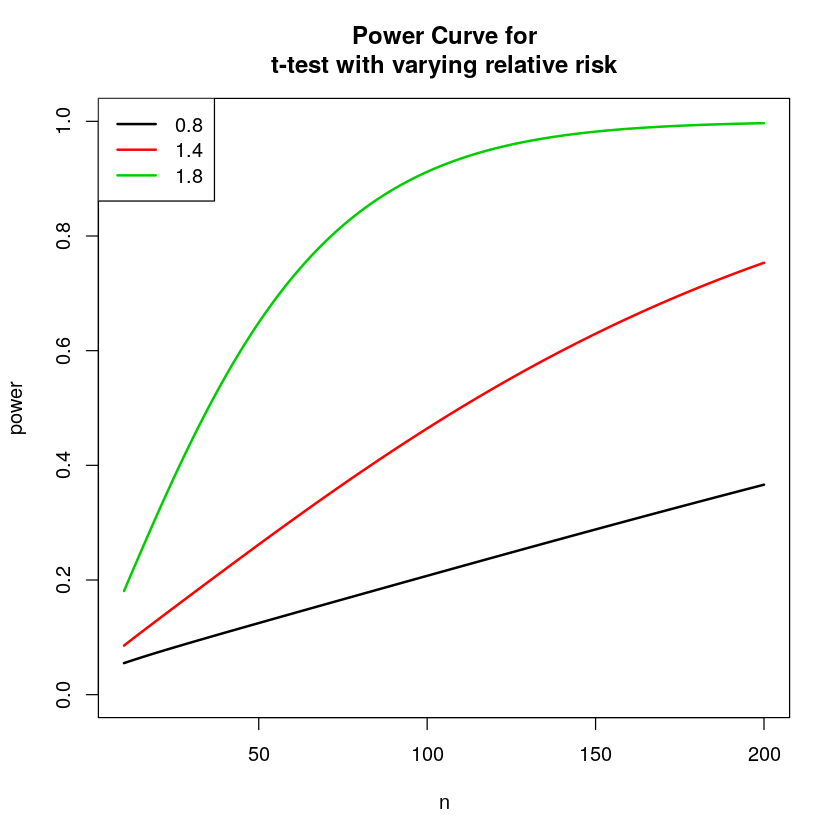

In [77]:
plot(nvals, seq(0, 1, length.out=length(nvals)), xlab="n", ylab="power",
main="Power Curve for\nt-test with varying relative risk", type="n")
for (i in 1:length(rrisks)) {
    powvals <- sapply(nvals, function (x) powerCT(Surv(stop, event)~enum2, dat=bl3,
        nE=x, nC=x, RR=rrisks[i])$power)
    lines(nvals, powvals, lwd=2, col=i)
}
legend("topleft", lwd=2, col=1:length(rrisks), legend=rrisks)